# Improve the performance of Deep Learning models with Hyper-Parameter Tuning

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential, layers, datasets
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

In [ ]:
stats = []
models = []

def simple_relu():
  return Sequential([
      layers.Flatten(input_shape=(28, 28)),
      layers.Dense(64, activation='relu'),
      layers.Dropout(.2),
      layers.Dense(10),
  ], name='simple_relu')
models.append(simple_relu)

def simple_tanh():
  return Sequential([
      layers.Flatten(input_shape=(28, 28)),
      layers.Dropout(.2),
      layers.Dense(64, activation='tanh'),
      layers.Dense(10),
  ], name='simple_tanh')
models.append(simple_tanh)

def convnet():
  return Sequential([
      layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      layers.MaxPooling2D((2, 2)),
      layers.BatchNormalization(),
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.BatchNormalization(),
      layers.Conv2D(16, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      layers.BatchNormalization(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(.2),
      layers.Dense(10),
  ], name='convnet')
models.append(convnet)

In [ ]:
(rX_train, ry_train), (rX_test, ry_test) = datasets.mnist.load_data()
rX_train, rX_test = rX_train / 255., rX_test / 255.

In [ ]:
for test_size in [.1, .3, .5]:
  X_train, X_test, y_train, y_test = train_test_split(rX_train, ry_train, test_size=test_size)
  for model_fn in models:
    for lr in [.1, .01]:
      for epoch_rate in [5, 10]:
        model = model_fn()
        loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
        h = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch_rate)
        stats.append({'name': model.name, 'lr': lr, 'epoch_rate': h.epoch, 'h': h, 'test_size': test_size})

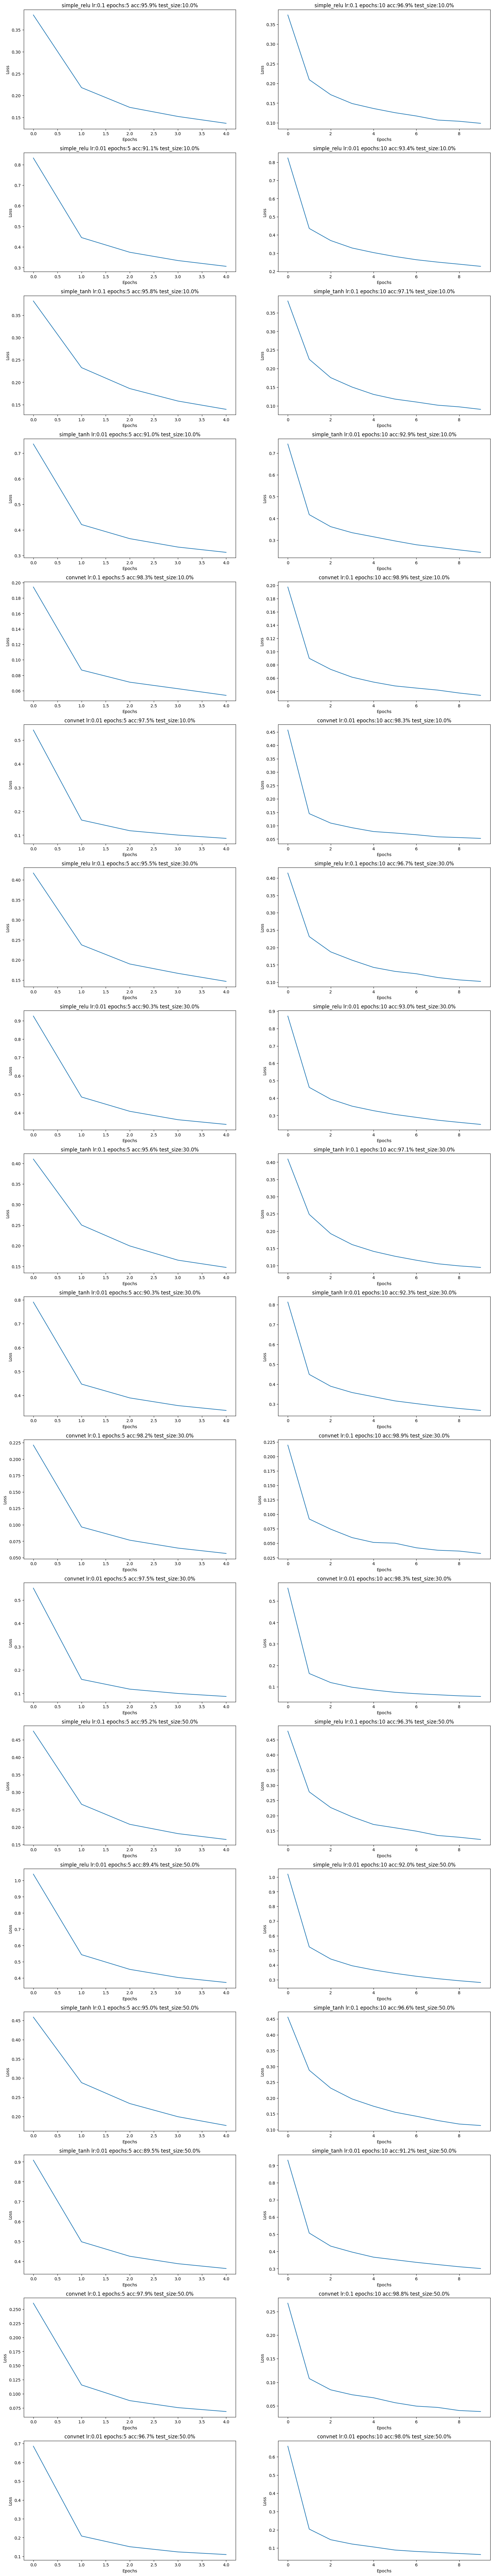

In [ ]:
plt.figure(figsize=(20, 110))
s = 1
for stat in stats:
  plt.subplot(18, 2, s)
  acc = stat['h'].history['accuracy'][-1] * 100
  name = f"{stat['name']} lr:{stat['lr']} epochs:{stat['epoch_rate'].__len__()} acc:{acc:.1f}% test_size:{stat['test_size'] * 100}%"
  plt.title(name)
  plt.plot(stat['epoch_rate'], stat['h'].history['loss'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  s += 1